In [1]:
# Updaing changes in local modules

%load_ext autoreload
%autoreload 2

In [2]:
# Imports

## External Imports
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from afinn import Afinn
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

## Local Imports
from character_network_iterative import *

In [3]:
# Constants

BOOKS_FOLDER = '../books'
NOVEL_NAME = "Tom Clancy"
NOVEL_FILE_NAME = "Clancy Tom - Patriot Games.txt"
SPACY_SM_MODEL = 'en_core_web_sm'
SPACY_LG_MODEL = 'en_core_web_lg'
LOCATION_LABELS = ["GPE", "LOC", "FAC"]
TOP_NAMES_COUNT = 10

In [4]:
# Data preparation

print("Loading the spacy model...")
nlp_names_func = spacy.load(SPACY_SM_MODEL)
nlp_location_func = spacy.load(SPACY_LG_MODEL, disable=['parser', 'tagger'])
nlp_funcs = {"Names": (nlp_names_func, None), "Locations": (nlp_location_func, LOCATION_LABELS)}

print("Reading novel: {} from: {}...".format(NOVEL_NAME, NOVEL_FILE_NAME))
novel = read_text(BOOKS_FOLDER, NOVEL_FILE_NAME)

print("Extracting the novel's sentences...")
sentence_list = sent_tokenize(novel)

print("{} sentences extracted.".format(len(sentence_list)))

Loading the spacy model...
Reading novel: Tom Clancy from: Clancy Tom - Patriot Games.txt...
Extracting the novel's sentences...
17669 sentences extracted.


In [5]:
# Text processing

print("Extracting affinity rate, characters and locations...")

#preliminary_name_list = iterative_NER(nlp_names_func, sentence_list)
preliminary_name_list, align_rate = process_sentences(nlp_funcs, sentence_list)

print("Done")

Extracting affinity rate, characters and locations...
Iterating the sentences:
Processed 0% of the sentences. (0 seconds passed)
Processed 5% of the sentences. (9 seconds passed)
Processed 10% of the sentences. (18 seconds passed)
Processed 15% of the sentences. (26 seconds passed)
Processed 20% of the sentences. (35 seconds passed)
Processed 25% of the sentences. (43 seconds passed)
Processed 30% of the sentences. (52 seconds passed)
Processed 35% of the sentences. (61 seconds passed)
Processed 40% of the sentences. (70 seconds passed)
Processed 45% of the sentences. (79 seconds passed)
Processed 50% of the sentences. (88 seconds passed)
Processed 55% of the sentences. (97 seconds passed)
Processed 60% of the sentences. (106 seconds passed)
Processed 65% of the sentences. (115 seconds passed)
Processed 70% of the sentences. (124 seconds passed)
Processed 75% of the sentences. (134 seconds passed)
Processed 80% of the sentences. (144 seconds passed)
Processed 85% of the sentences. (153

In [6]:
print("Getting top {} names and locations...".format(TOP_NAMES_COUNT))
name_frequency, name_list = top_names(preliminary_name_list["Names"], novel, 2*TOP_NAMES_COUNT)
place_frequency, place_list = top_names(preliminary_name_list["Locations"], novel, TOP_NAMES_COUNT)

# TODO: combine first and last names

print("Calculating the relations between the characters...")
cooccurrence_matrix, sentiment_matrix = calculate_matrix(name_list, sentence_list, align_rate)

print("Characters relation matrix calculated.")

Getting top 10 names and locations...
Calculating the relations between the characters...
Characters relation matrix calculated.


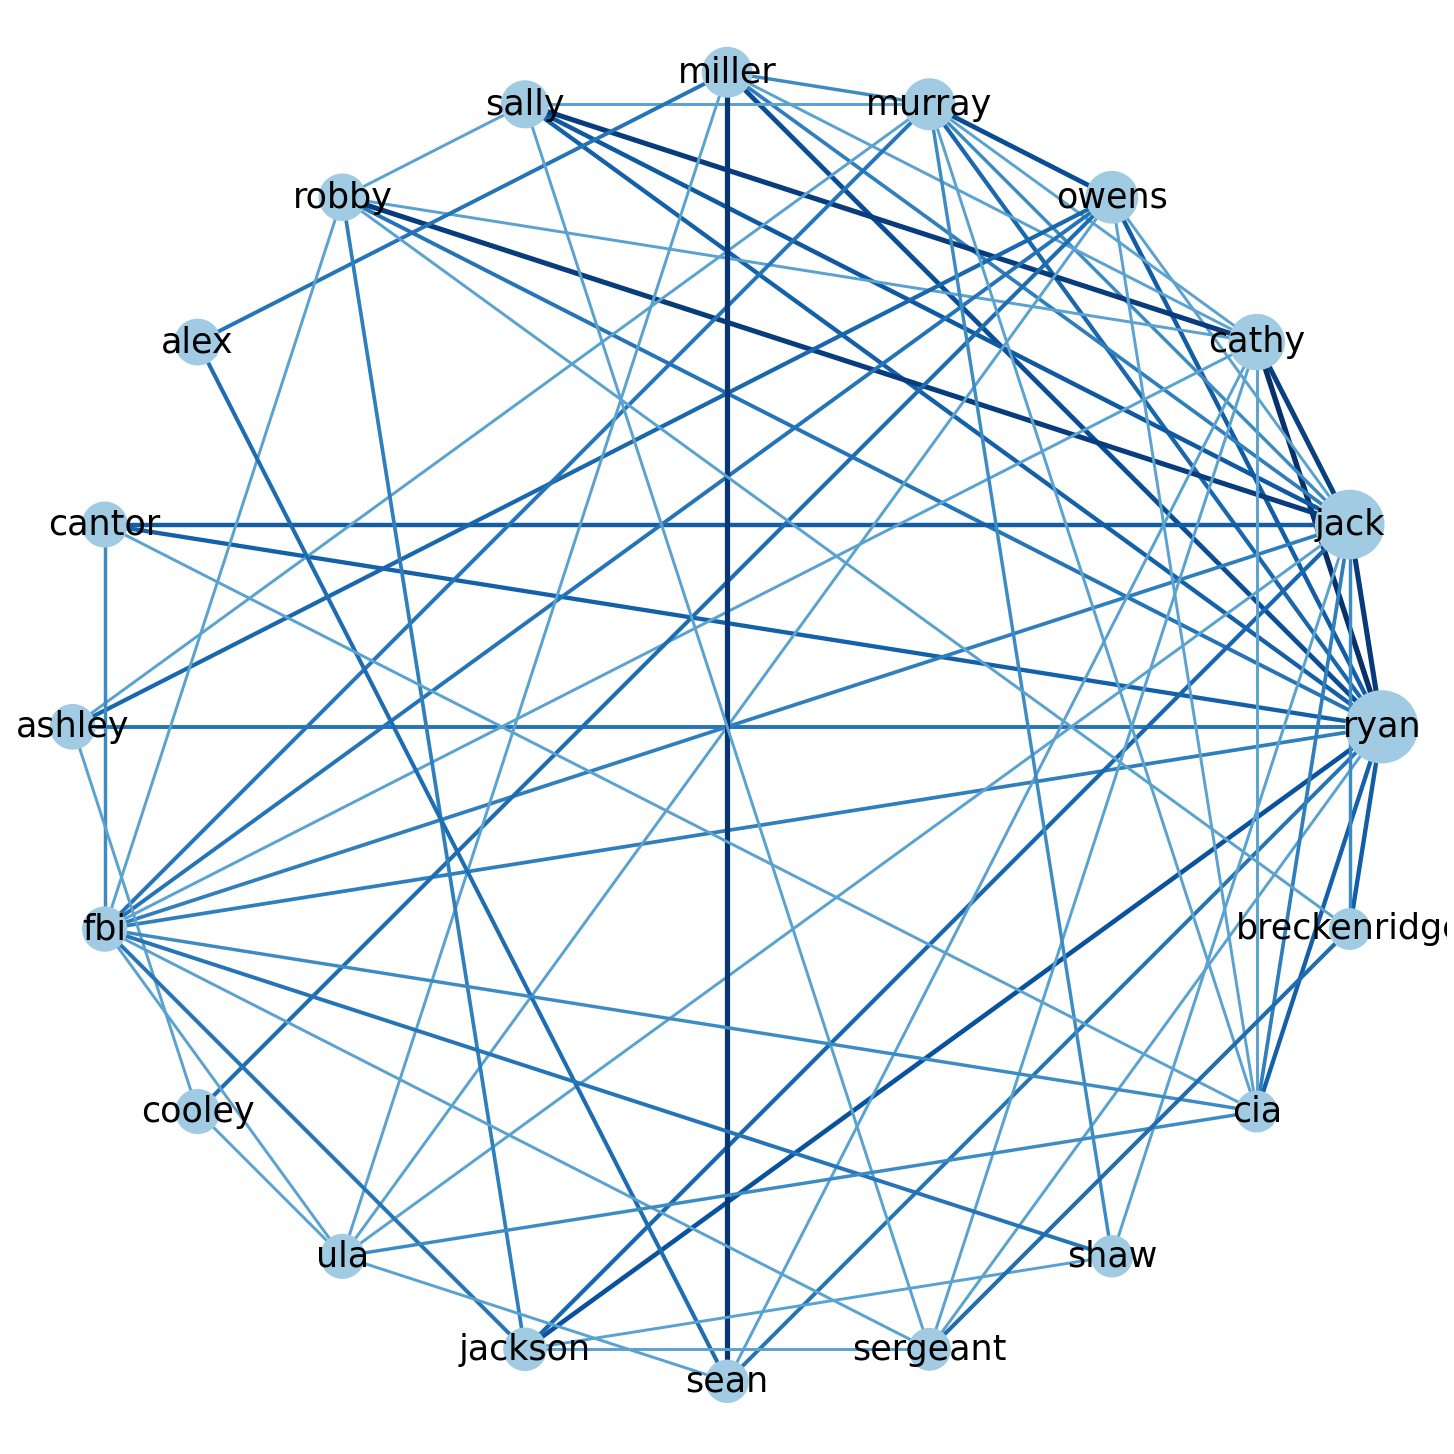

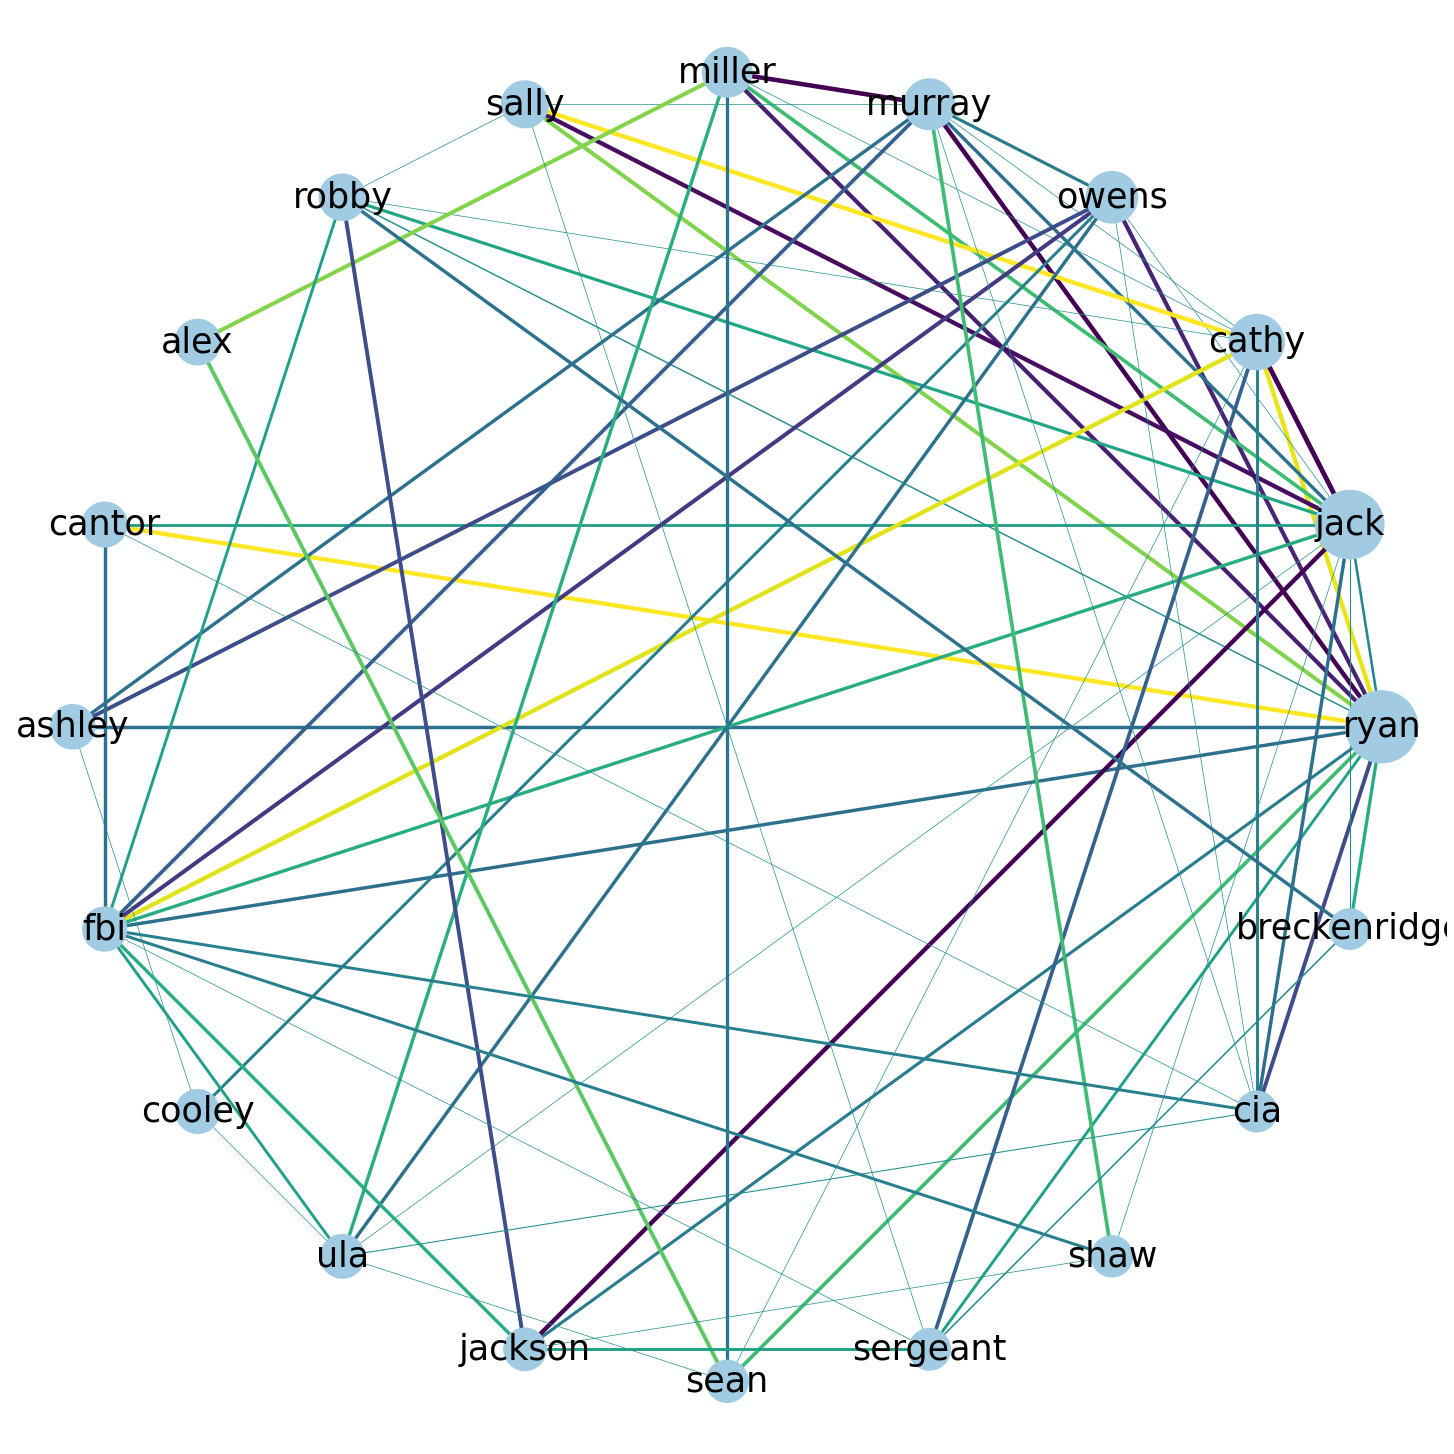

In [7]:
plot_graph(name_list, name_frequency, cooccurrence_matrix, NOVEL_NAME + ' co-occurrence graph', 'co-occurrence')
plot_graph(name_list, name_frequency, sentiment_matrix, NOVEL_NAME + ' sentiment graph', 'sentiment')

In [8]:
combined_name_place_list = name_list + place_list
combined_name_place_freq_list = name_frequency + place_frequency
cooccurrence_matrix_combined, sentiment_matrix_combined = calculate_matrix(combined_name_place_list, sentence_list, align_rate)

[('london', 'ryan', {'weight': 4.068496949505678, 'color': 5.812138499293826}), ('london', 'jack', {'weight': 3.7123134356413527, 'color': 5.303304908059076}), ('london', 'cathy', {'weight': 2.9502155832615746, 'color': 4.214593690373678}), ('london', 'owens', {'weight': 3.4302269912950014, 'color': 4.9003242732785735}), ('london', 'murray', {'weight': 3.9128196976950558, 'color': 5.589742425278652}), ('london', 'miller', {'weight': 2.9502155832615746, 'color': 4.214593690373678}), ('london', 'fbi', {'weight': 3.4302269912950014, 'color': 4.9003242732785735}), ('london', 'sean', {'weight': 2.9502155832615746, 'color': 4.214593690373678}), ('london', 'shaw', {'weight': 2.9502155832615746, 'color': 4.214593690373678}), ('london', 'breckenridge', {'weight': 2.9502155832615746, 'color': 4.214593690373678}), ('highland', 'miller', {'weight': 3.4302269912950014, 'color': 4.9003242732785735}), ('highland', 'sean', {'weight': 2.9502155832615746, 'color': 4.214593690373678}), ('highland', 'serg

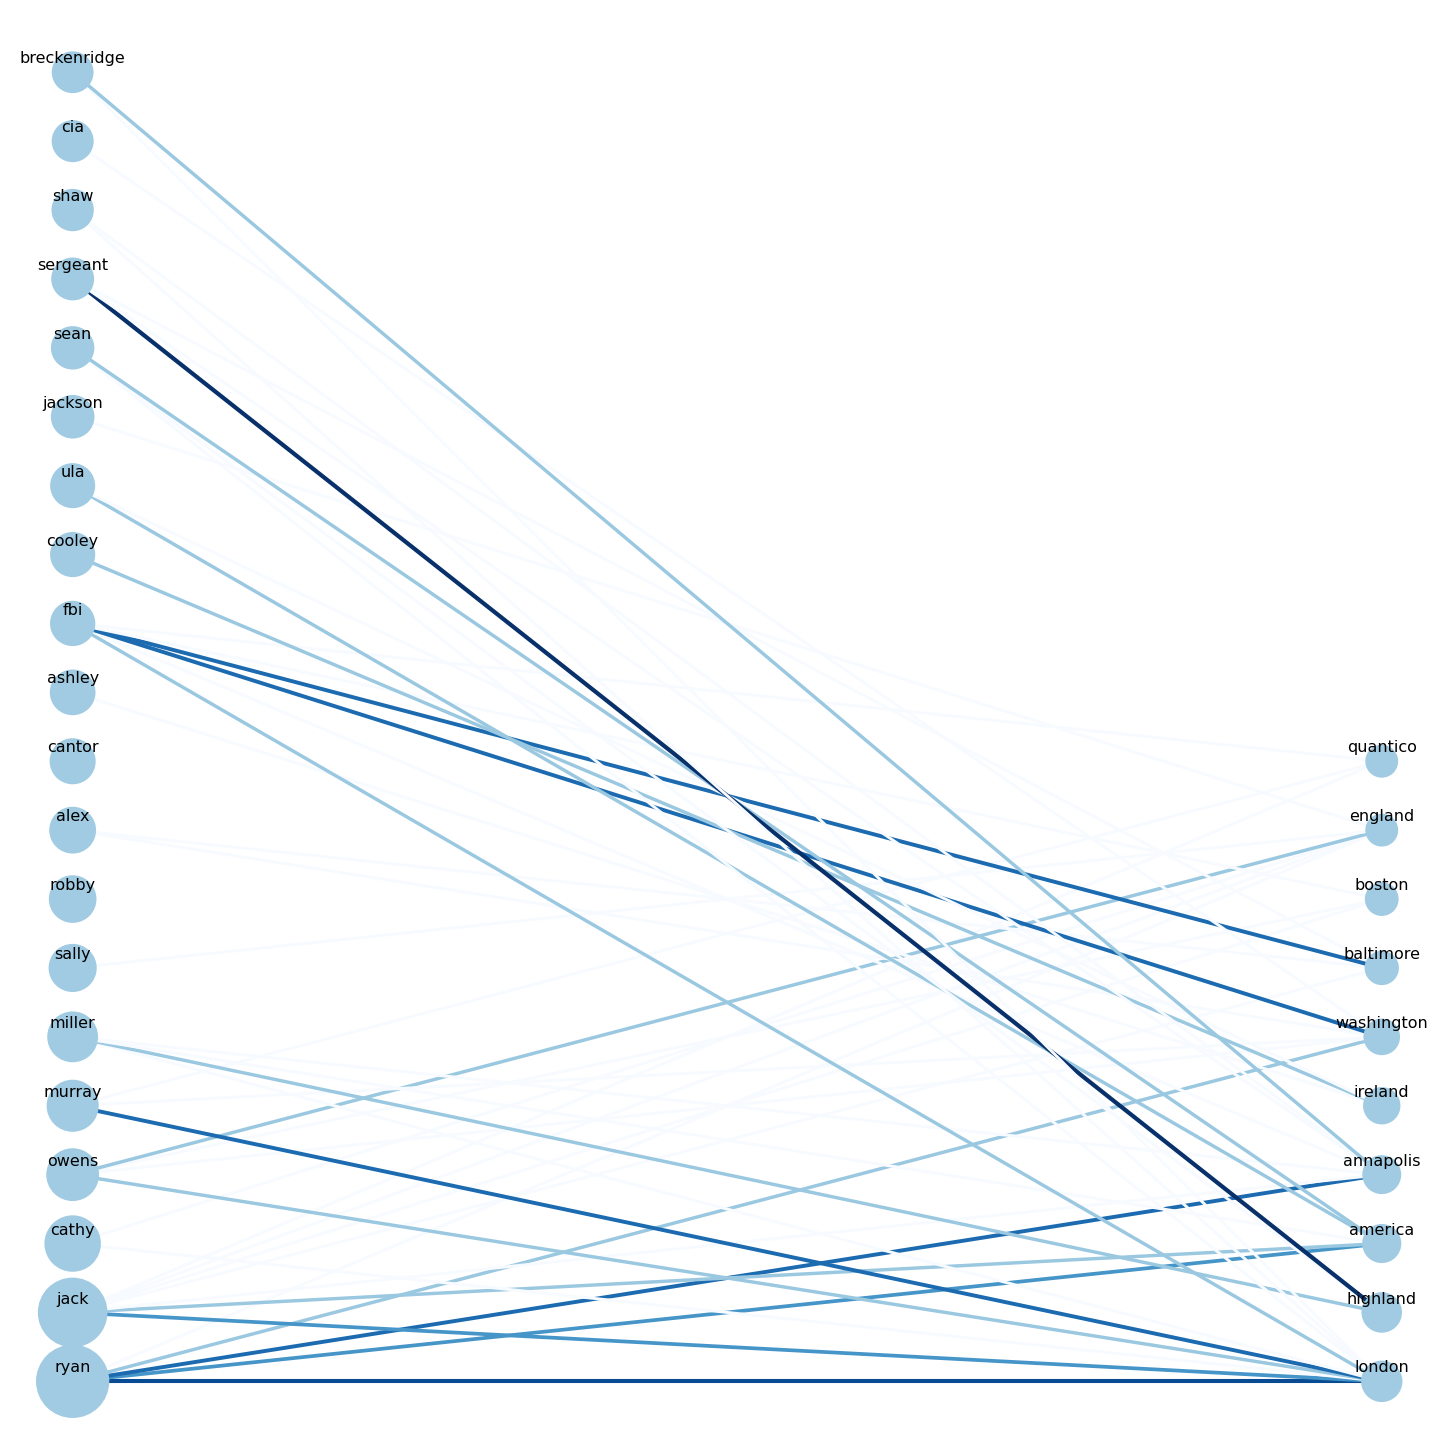

In [9]:
plot_graph_v3(name_list, name_frequency, place_list, place_frequency, cooccurrence_matrix_combined, NOVEL_NAME + ' co-occurrence graph', 'co-occurrence')

In [10]:
combined_name_place_list

['ryan',
 'jack',
 'cathy',
 'owens',
 'murray',
 'miller',
 'sally',
 'robby',
 'alex',
 'cantor',
 'ashley',
 'fbi',
 'cooley',
 'ula',
 'jackson',
 'sean',
 'sergeant',
 'shaw',
 'cia',
 'breckenridge',
 'london',
 'highland',
 'america',
 'annapolis',
 'ireland',
 'washington',
 'baltimore',
 'boston',
 'england',
 'quantico']